In [7]:
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Input, Dense, Dropout
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
import os
import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

In [ ]:
train_dir =  '/content/drive/My Drive/archive/Training'
validation_dir = '/content/drive/My Drive/archive/Validation'

In [ ]:
male_train_len = len(os.listdir(train_dir + '/' + 'male'))
female_train_len = len(os.listdir(train_dir + '/' + 'female'))
male_val_len = len(os.listdir(validation_dir + '/' + 'male'))
female_val_len = len(os.listdir(validation_dir + '/' + 'female'))

print('male_train_len : ', male_train_len)
print('female_train_len : ', female_train_len)
print('male_val_len : ', male_val_len)
print('female_val_len : ', female_val_len)

male_train_len :  23000
female_train_len :  23253
male_val_len :  5808
female_val_len :  5841


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, class_mode='binary', batch_size=64, target_size=(150,150))
validation_generator = validation_datagen.flow_from_directory(validation_dir, class_mode='binary', batch_size=64, target_size=(150,150))


Found 46253 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [3]:
def gender_model(input_shape):

  X_input = Input(input_shape)

  X = Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')(X_input)
  X = BatchNormalization()(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu')(X)
  X = BatchNormalization()(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(X)
  X = BatchNormalization()(X)
  X = MaxPooling2D((2,2))(X)

  X = Flatten()(X)

  X = Dense(256, activation='relu')(X)

  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_input, outputs=X)

  return model


In [ ]:
model = gender_model((150,150,3))

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 73, 73, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 73, 73, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0   

In [4]:
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(150,150,3))

for layer in inception.layers:
  layer.trainable = False
  

87916544/87910968 [==============================] - 355s 4us/step


In [5]:
last_layer = inception.get_layer('mixed9')
last_output = last_layer.output

X = Flatten()(last_output)

X = Dense(256, activation='relu')(X)

X = Dropout(0.8)(X)

X = Dense(1, activation='sigmoid')(X)

model = Model(inception.input, outputs=X)

model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
723/723 [==============================] - 16941s 23s/step - loss: 0.2820 - accuracy: 0.8820 - val_loss: 0.1510 - val_accuracy: 0.9412
Epoch 2/10
723/723 [==============================] - 94s 131ms/step - loss: 0.1757 - accuracy: 0.9359 - val_loss: 0.1387 - val_accuracy: 0.9460
Epoch 3/10
723/723 [==============================] - 93s 129ms/step - loss: 0.1628 - accuracy: 0.9402 - val_loss: 0.1318 - val_accuracy: 0.9479
Epoch 4/10
723/723 [==============================] - 93s 129ms/step - loss: 0.1508 - accuracy: 0.9439 - val_loss: 0.1309 - val_accuracy: 0.9506
Epoch 5/10
723/723 [==============================] - 93s 129ms/step - loss: 0.1416 - accuracy: 0.9495 - val_loss: 0.1253 - val_accuracy: 0.9514
Epoch 6/10
723/723 [==============================] - 93s 129ms/step - loss: 0.1319 - accuracy: 0.9506 - val_loss: 0.1240 - val_accuracy: 0.9539
Epoch 7/10
723/723 [==============================] - 93s 129ms/step - loss: 0.1275 - accuracy: 0.9539 - val_loss: 0.1223 - val_a

In [6]:
weights_path = 'C:\\Users\\ketan\\Desktop\\Machine Learning\\Gender Classification\\gender_weights1.hdf5'
model.load_weights(weights_path)

In [ ]:
img_path = 'test.jpg'
img = image.load_img(img_path, target_size=(150,150))

In [ ]:
x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x, axis=0)
x.shape

(1, 150, 150, 3)

In [ ]:
model.predict(x)

array([[0.24610125]], dtype=float32)

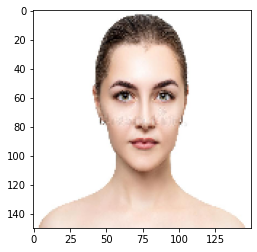

In [ ]:
plt.imshow(img)

In [8]:
face_haar_cascade = cv2.CascadeClassifier('C:\\Users\\ketan\\Desktop\\Machine Learning\\Facial Expression\\archive\\haarcascade_frontalface_default.xml')

In [ ]:
cap = cv2.VideoCapture(0)

while True:
 
 _,cap_image = cap.read()




 #cap_img_gray = cv2.cvtColor(cap_image, cv2.COLOR_BGR2GRAY)

 faces = face_haar_cascade.detectMultiScale(cap_image, 1.3, 5)

 for (x,y,w,h) in faces:

   cv2.rectangle(cap_image, (x,y), (x+w,y+h),(255,0,0),2)
   roi_gray = cap_image[y:y+h, x:x+w]
   roi_gray = cv2.resize(roi_gray, (150,150))
   img_pixels = image.img_to_array(roi_gray)
   img_pixels = np.expand_dims(img_pixels, axis=0)
   img_pixels = img_pixels/255

   predictions = model.predict(img_pixels)
   
   if (predictions<0.5):
     gender_prediction = 'female'
   else:
     gender_prediction = 'male'
  
   cv2.putText(cap_image, gender_prediction, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,0,0), 1 )

   resize_image = cv2.resize(cap_image, (1000,700))
   cv2.imshow('Emotion',resize_image)

   if cv2.waitKey(10) == ord('b'):
    break
  
cap.release()
cv2.destroyAllWindows 
